In [1]:
import os

import numpy as np
import pandas as pd
import itertools as it

%matplotlib inline
import seaborn as sns 
import matplotlib as mpl
import matplotlib.colors as mcolors
mpl.rcParams.update(mpl.rcParamsDefault)

from matplotlib import pyplot as plt
plt.style.use("seaborn-v0_8-white")

import warnings
warnings.filterwarnings('ignore')

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_input_path = lambda fname: os.path.normpath('../local_data/processed_data/'+ fname)
get_results_path = lambda fname: os.path.normpath('../local_data/results/'+ fname)
get_figures_path = lambda fname: os.path.normpath('../local_data/figures/'+ fname)

In [3]:
# file_collated_results_cptac = get_results_path('Collated_results_CPTAC.parquet')
file_collated_results_cptac_im = get_results_path('Collated_IM_Results_CPTAC.parquet')
file_collated_results_cptac_tm = get_results_path('Collated_TM_Results_CPTAC.parquet')
file_collated_results_cptac_loso = get_results_path('Collated_LOSO_Results_CPTAC.parquet')
file_protein_complexes = get_input_path('allComplexes.txt')
file_pi_400 = get_input_path('protein_interactions_400.csv')

In [4]:
CORUM = 'CORUM' 
PI400 = 'PI400'
PI800 = 'PI800'
PPI400 = 'PPI400'
PPI800 = 'PPI800'
VAE100 = 'VAE100'
VAE500 = 'VAE500'
VAE1000 = 'VAE1000'
ALL = 'Transcriptome'
BASELINE = 'Baseline'
VAE100PI400 = 'VAE100 + PI400'
VAE500PI400 = 'VAE500 + PI400'
VAE1000PI400 = 'VAE1000 + PI400'

In [5]:
protein_complexes = pd.read_csv(file_protein_complexes, sep="\t").dropna(subset=['subunits(Gene name)'])
complex_subunits = list(set([subunit for subunits in protein_complexes['subunits(Gene name)'].str.split(';') 
                            for subunit in subunits]))
complex_subunits[:4]

['', 'Sub1', 'RPL19', 'Taf2']

In [6]:
collated_results_loso = pd.read_parquet(file_collated_results_cptac_loso).reset_index().rename(columns={'index': 'Protein'})
collated_results_loso.replace('Pdac', 'PDAC', inplace=True)
collated_results_loso[:2]

,Protein,test_pearson,test_spearman,test_r2,test_rmse,test_nrmse,Study,FeatureSet
0,A2M,0.157005,0.156100,-0.123132,1.634801,0.268630,BrCa2020,Baseline
1,A2ML1,0.654152,0.550776,0.291372,2.708925,0.217844,BrCa2020,Baseline


In [7]:
collated_results_loso.FeatureSet.value_counts()

FeatureSet
Baseline           42595
PI400              24276
VAE100             24276
VAE500             24276
VAE1000            24276
VAE100 + PI400     24276
VAE500 + PI400     24276
VAE1000 + PI400    24276
Transcriptome      24276
Name: count, dtype: int64

In [8]:
collated_results_loso = collated_results_loso.groupby('Protein').filter(lambda x: len(x) > 8)
collated_results_loso.FeatureSet.value_counts()

FeatureSet
Baseline           24276
PI400              24276
VAE100             24276
VAE500             24276
VAE1000            24276
VAE100 + PI400     24276
VAE500 + PI400     24276
VAE1000 + PI400    24276
Transcriptome      24276
Name: count, dtype: int64

In [9]:
collated_results_im = pd.read_parquet(file_collated_results_cptac_im).reset_index().rename(columns={'index': 'Protein'})
collated_results_im.replace('Pdac', 'PDAC', inplace=True)
collated_results_im[:2]

,Protein,test_pearson,test_spearman,test_r2,test_rmse,test_nrmse,Study,FeatureSet
0,A2M,0.157005,0.156100,-0.123132,1.634801,0.268630,BrCa2020,Baseline
1,A2ML1,0.654152,0.550776,0.291372,2.708925,0.217844,BrCa2020,Baseline


In [10]:
collated_results_im.FeatureSet.value_counts()

FeatureSet
Baseline           42595
CORUM              42595
PI400              42595
PI800              42595
PPI400             42595
PPI800             42595
VAE100             42595
VAE500             42595
VAE1000            42595
Transcriptome      42595
VAE100 + PI400     42595
VAE500 + PI400     42595
VAE1000 + PI400    42595
Name: count, dtype: int64

In [11]:
collated_results_tm = pd.read_parquet(file_collated_results_cptac_tm).reset_index().rename(columns={'index': 'Protein'})
collated_results_tm.replace('Pdac', 'PDAC', inplace=True)
collated_results_tm[:2]

,Protein,test_pearson,test_spearman,test_r2,test_rmse,test_nrmse,Study,FeatureSet
0,A2M,0.157005,0.156100,-0.123132,1.634801,0.268630,BrCa2020,Baseline
1,A2ML1,0.654152,0.550776,0.291372,2.708925,0.217844,BrCa2020,Baseline


In [12]:
collated_results_tm.FeatureSet.value_counts()

FeatureSet
Baseline           42595
CORUM              24276
PI400              24276
PI800              24276
PPI400             24276
PPI800             24276
VAE100             24276
VAE500             24276
VAE1000            24276
Transcriptome      24276
VAE100 + PI400     24276
VAE500 + PI400     24276
VAE1000 + PI400    24276
Name: count, dtype: int64

In [13]:
collated_results_tm = collated_results_tm.groupby('Protein').filter(lambda x: len(x) > 11)
collated_results_tm.FeatureSet.value_counts()

FeatureSet
Baseline           24276
CORUM              24276
PI400              24276
PI800              24276
PPI400             24276
PPI800             24276
VAE100             24276
VAE500             24276
VAE1000            24276
Transcriptome      24276
VAE100 + PI400     24276
VAE500 + PI400     24276
VAE1000 + PI400    24276
Name: count, dtype: int64

In [14]:
def compute_improvement(df, study):
    studydf = df[df['Study'] == study]
    improvement_df = pd.concat([studydf.groupby(['Protein'])['test_pearson'].apply(lambda x: x.sub(x.iloc[0]) if(len(x) > 1) else x).reset_index().set_index('level_1'),
                                studydf.groupby(['Protein'])['test_spearman'].apply(lambda x: x.sub(x.iloc[0]) if(len(x) > 1) else x).reset_index().set_index('level_1').drop(columns='Protein'), 
                                studydf.groupby(['Protein'])['test_r2'].apply(lambda x: x.sub(x.iloc[0]) if(len(x) > 1) else x).reset_index().set_index('level_1').drop(columns='Protein'),
                                studydf.groupby(['Protein'])['test_rmse'].apply(lambda x: x.sub(x.iloc[0]) if(len(x) > 1) else x).reset_index().set_index('level_1').drop(columns='Protein'), 
                                studydf.groupby(['Protein'])['test_nrmse'].apply(lambda x: x.sub(x.iloc[0]) if(len(x) > 1) else x).reset_index().set_index('level_1').drop(columns='Protein'),
                                studydf['FeatureSet']], axis=1)
    improvement_df = pd.concat([improvement_df[improvement_df['FeatureSet'] != 'Baseline'], 
                                studydf[studydf['FeatureSet'] == 'Baseline']])
    improvement_df['Study'] = study
    return improvement_df


def get_improvement_df(df): 
    improvement_df = pd.concat([compute_improvement(df, 'PDAC'), 
                                compute_improvement(df, 'BrCa2020'),
                                compute_improvement(df, 'ccRCC'),
                                compute_improvement(df, 'LUAD'), 
                                compute_improvement(df, 'HNSCC'),
                                compute_improvement(df, 'LSCC')])
    return(improvement_df)

def get_mean_across_proteins(data, column='test_pearson'):
    aggregated_results = data.set_index('Protein').groupby(['Study', 'FeatureSet']).mean().reset_index()[[column, 'Study', 
                                                                     'FeatureSet']].pivot(columns='Study', index='FeatureSet')
    aggregated_results.columns = aggregated_results.columns.droplevel()
    aggregated_results.rename(columns=lambda x: x.replace('BrCa2020', 'BrCa\n2020'), inplace=True)
    
    index_ordering = aggregated_results.mean(axis=1).sort_values(ascending=False).index.to_list()
    index_ordering.pop(index_ordering.index(BASELINE))
    aggregated_results = aggregated_results.reindex(index_ordering + [BASELINE])
    aggregated_results = aggregated_results.reindex(['PDAC', 'BrCa\n2020', 'LUAD', 'ccRCC', 'HNSCC', 'LSCC'], axis=1)
    return(aggregated_results)

In [15]:
improvement_im = get_improvement_df(collated_results_im)
improvement_tm = get_improvement_df(collated_results_tm)
improvement_loso = get_improvement_df(collated_results_loso)

In [16]:
aggregated_improvement_im = get_mean_across_proteins(improvement_im)
aggregated_improvement_tm = get_mean_across_proteins(improvement_tm)
aggregated_improvement_loso = get_mean_across_proteins(improvement_loso)

In [17]:
figs4_features = [BASELINE, CORUM, PI400, PI800, PPI400, PPI800]
ai_im_figs4a = aggregated_improvement_im[aggregated_improvement_im.index.isin(figs4_features)]
ai_tm_figs4b = aggregated_improvement_tm[aggregated_improvement_tm.index.isin(figs4_features)]

In [18]:
complex_subunits_tm = improvement_tm[improvement_tm['Protein'].isin(complex_subunits)]
complex_subunits_im = improvement_im[improvement_im['Protein'].isin(complex_subunits)]
aggregated_improvement_complexes_tm = get_mean_across_proteins(complex_subunits_tm)
aggregated_improvement_complexes_im = get_mean_across_proteins(complex_subunits_im)

ai_im_figs4c = aggregated_improvement_complexes_im[aggregated_improvement_complexes_im.index.isin(figs4_features)]
ai_tm_figs4d = aggregated_improvement_complexes_tm[aggregated_improvement_complexes_tm.index.isin(figs4_features)]

In [19]:
improvement_im.groupby(['Study', 'FeatureSet']).Protein.nunique()

Study     FeatureSet     
BrCa2020  Baseline           7421
          CORUM              7421
          PI400              7421
          PI800              7421
          PPI400             7421
                             ... 
ccRCC     VAE100 + PI400     6413
          VAE1000            6413
          VAE1000 + PI400    6413
          VAE500             6413
          VAE500 + PI400     6413
Name: Protein, Length: 78, dtype: int64

In [20]:
complex_subunits_im.groupby(['Study', 'FeatureSet']).Protein.nunique()

Study     FeatureSet     
BrCa2020  Baseline           2447
          CORUM              2447
          PI400              2447
          PI800              2447
          PPI400             2447
                             ... 
ccRCC     VAE100 + PI400     2141
          VAE1000            2141
          VAE1000 + PI400    2141
          VAE500             2141
          VAE500 + PI400     2141
Name: Protein, Length: 78, dtype: int64

In [21]:
fig2_features = [BASELINE, VAE100, VAE500, VAE1000]
ai_im_fig2 = aggregated_improvement_im[aggregated_improvement_im.index.isin(fig2_features)]
ai_tm_fig2 = aggregated_improvement_tm[aggregated_improvement_tm.index.isin(fig2_features)]

In [22]:
fig3_features = [BASELINE, VAE100PI400, VAE500PI400, VAE1000PI400, ALL]
ai_im_fig3 = aggregated_improvement_im[aggregated_improvement_im.index.isin(fig3_features)]
ai_tm_fig3 = aggregated_improvement_tm[aggregated_improvement_tm.index.isin(fig3_features)]

In [23]:
fig4_features = [BASELINE, PI400, VAE100, VAE500, VAE1000, VAE100PI400, VAE500PI400, VAE1000PI400, ALL]
ai_loso_fig4 = aggregated_improvement_loso[aggregated_improvement_loso.index.isin(fig4_features)]

In [24]:
def draw_multicolored_heatmap(data, ax, vmin, vmax, fontsize, title='Trans-tissue Model', title_fontsize=14, 
                              cmap='Blues', center_at_zero=False):
    
    features_data = data.drop(index=[BASELINE])
    baseline_data = data[data.index.isin([BASELINE])]
    
    max_in_each_column = np.max(features_data, axis=0)
    if(center_at_zero):
        normalize = mcolors.TwoSlopeNorm(vcenter=0, vmin=vmin, vmax=vmax)
        image = sns.heatmap(features_data, mask=(features_data == max_in_each_column), 
                            annot_kws={"fontsize":fontsize}, xticklabels=False, norm=normalize,
                            annot=True, fmt='.3g', cbar=False, cmap=cmap, ax=ax[1], vmin=vmin, vmax=vmax)
    
        sns.heatmap(features_data, mask=(features_data != max_in_each_column), norm=normalize,
                    annot_kws={"style": "italic", "weight": "bold", "fontsize":fontsize}, 
                    annot=True, fmt='.3g', cbar=False, cmap=cmap, ax=ax[1], vmin=vmin, vmax=vmax )
        
    else:
        image = sns.heatmap(features_data, mask=(features_data == max_in_each_column), 
                            annot_kws={"fontsize":fontsize}, xticklabels=False,
                            annot=True, fmt='.3g', cbar=False, cmap=cmap, ax=ax[1], vmin=vmin, vmax=vmax)
    
        sns.heatmap(features_data, mask=(features_data != max_in_each_column), 
                    annot_kws={"style": "italic", "weight": "bold", "fontsize":fontsize}, 
                    annot=True, fmt='.3g', cbar=False, cmap=cmap, ax=ax[1], vmin=vmin, vmax=vmax )
    
    sns.heatmap(baseline_data, annot_kws={"fontsize":fontsize}, xticklabels=False,
                annot=True, fmt='.3g', cbar=False, cmap=sns.color_palette("light:#999", as_cmap=True), ax=ax[0])
    
    ax[0].set_title(title, fontsize=title_fontsize, pad=10)
    ax[0].set_ylabel(None)
    ax[0].set_xlabel(None)
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation = 0)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 0)
    
    ax[1].set_ylabel(None)
    ax[1].set_xlabel(None)
    ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation = 0)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 0)
    
    return(image)

In [25]:
def draw_heatmaps(im_data, tm_data, ax, title1='Cancer-specific Model', title2 = 'Trans-tissue Model', 
                           anchor_position=-4.5, fontsize=10, title_fontsize=14):
    im_data_subset = im_data.drop(index=[BASELINE])
    tm_data_subset = tm_data.drop(index=[BASELINE])
    vmin = min(im_data_subset.min().min(), tm_data_subset.min().min())
    vmax = max(im_data_subset.max().max(), tm_data_subset.max().max())
    
    image = draw_multicolored_heatmap(im_data, axs[:, 0], vmin, vmax, fontsize, title1, title_fontsize) 
    draw_multicolored_heatmap(tm_data, axs[:, 1], vmin, vmax, fontsize, title2, title_fontsize) 
    
    mappable = image.get_children()[0]
    cb = plt.colorbar(mappable, ax = axs, orientation = 'horizontal', anchor=(1.0, anchor_position), aspect=30)
    cb.set_label(label='Improvement over Baseline', size=title_fontsize-1)

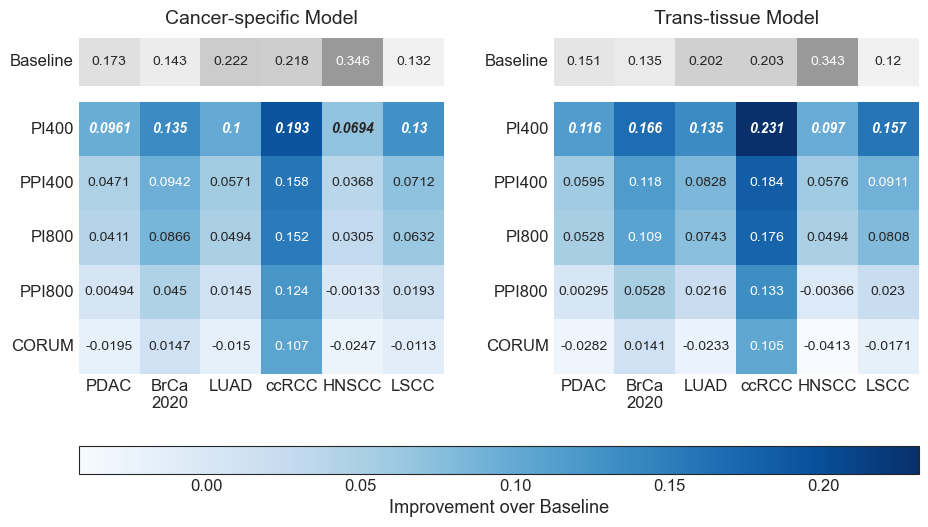

In [26]:
with plt.rc_context({'axes.linewidth': 0.8, 'xtick.labelsize':12, 'ytick.labelsize':12}):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10.5, 6), gridspec_kw={"height_ratios":[1.5, 8.5]})
    plt.subplots_adjust(left=0.07, right=0.87, bottom=0.1, top=0.9, wspace=0.3, hspace=0.1 )
    draw_heatmaps(ai_im_figs4a, ai_tm_figs4b, axs, anchor_position=1)
    fig.savefig(get_figures_path('FigureS4AB.png'), bbox_inches='tight', dpi=300);
    fig.savefig(get_figures_path('FigureS4AB.svg'), bbox_inches='tight', dpi=300);
    plt.show()

In [27]:
ai_im_figs4a

Study,PDAC,BrCa\n2020,LUAD,ccRCC,HNSCC,LSCC
FeatureSet,,,,,,
PI400,0.096067,0.134559,0.100415,0.193077,0.069382,0.129612
PPI400,0.047143,0.094217,0.057051,0.157811,0.036833,0.071196
PI800,0.041092,0.086612,0.049384,0.152317,0.030459,0.063208
PPI800,0.004943,0.045045,0.014504,0.124159,-0.001330,0.019278
CORUM,-0.019468,0.014704,-0.014982,0.107428,-0.024698,-0.011315
Baseline,0.173080,0.143175,0.222433,0.217521,0.345983,0.132307


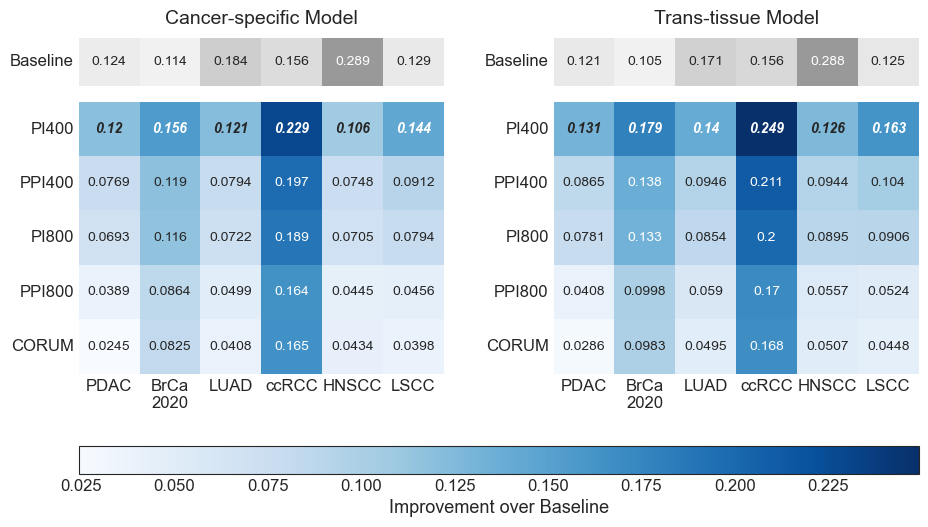

In [28]:
with plt.rc_context({'axes.linewidth': 0.8, 'xtick.labelsize':12, 'ytick.labelsize':12}):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10.5, 6), gridspec_kw={"height_ratios":[1.5, 8.5]})
    plt.subplots_adjust(left=0.07, right=0.87, bottom=0.1, top=0.9, wspace=0.3, hspace=0.1 )
    draw_heatmaps(ai_im_figs4c, ai_tm_figs4d, axs, anchor_position=1)
    fig.savefig(get_figures_path('FigureS4CD.png'), bbox_inches='tight', dpi=300);
    fig.savefig(get_figures_path('FigureS4CD.svg'), bbox_inches='tight', dpi=300);
    plt.show()

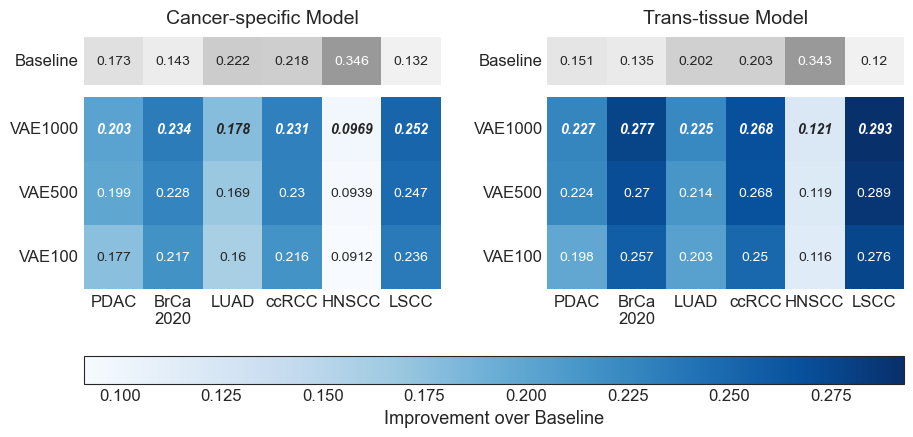

In [29]:
with plt.rc_context({'axes.linewidth': 0.8, 'xtick.labelsize':12, 'ytick.labelsize':12}):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10.25, 4.5), gridspec_kw={"height_ratios":[2, 8]})
    plt.subplots_adjust(left=0.07, right=0.87, bottom=0.1, top=0.9, wspace=0.3, hspace=0.1 )
    draw_heatmaps(ai_im_fig2, ai_tm_fig2, axs, anchor_position=0.5)
    fig.savefig(get_figures_path('Figure2.png'), bbox_inches='tight', dpi=300);
    plt.show()

In [30]:
pd.concat([ai_im_fig2.mean(axis=1).round(3), ai_tm_fig2.mean(axis=1).round(3)], 
          axis=1).rename(columns={0: 'Cancer-specific Model', 1: 'Trans-tissue Model'})

,Cancer-specific Model,Trans-tissue Model
FeatureSet,,
VAE1000,0.199,0.235
VAE500,0.194,0.230
VAE100,0.183,0.217
Baseline,0.206,0.192


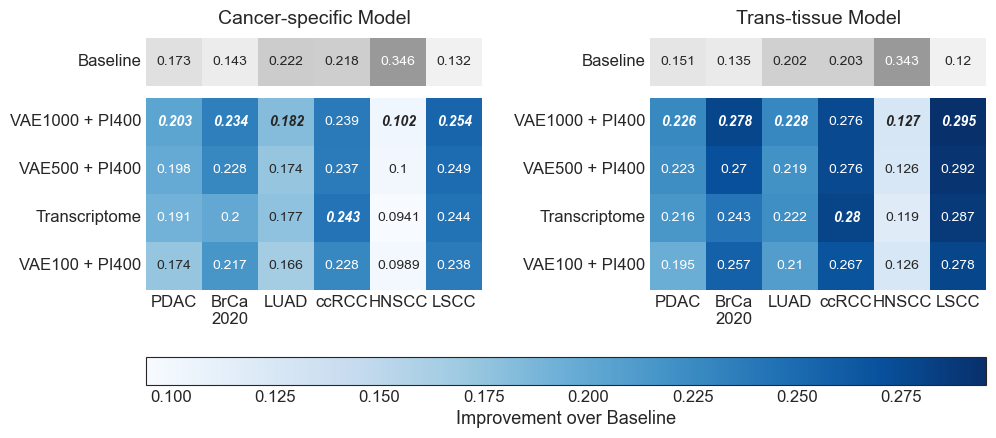

In [31]:
with plt.rc_context({'axes.linewidth': 0.8, 'xtick.labelsize':12, 'ytick.labelsize':12}):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10.5, 4.5), gridspec_kw={"height_ratios":[2, 8]})
    plt.subplots_adjust(left=0.07, right=0.87, bottom=0.1, top=0.9, wspace=0.5, hspace=0.1)
    draw_heatmaps(ai_im_fig3, ai_tm_fig3, axs, anchor_position=0.5)
    fig.savefig(get_figures_path('Figure3.png'), bbox_inches='tight', dpi=300);
    plt.show()

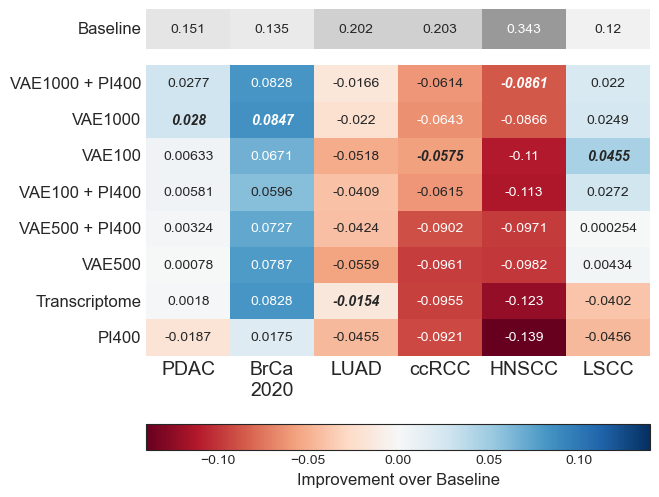

In [32]:
with plt.rc_context({'axes.linewidth': 0.8, 'xtick.labelsize':14, 'ytick.labelsize':12}):
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6.5, 4.5), gridspec_kw={"height_ratios":[1.2, 8.8]})
    image = draw_multicolored_heatmap(ai_loso_fig4, axs, 
                                      ai_loso_fig4.drop(index=[BASELINE]).min().min(), 
                                      -ai_loso_fig4.drop(index=[BASELINE]).min().min(), 
                                      fontsize=10, title='', title_fontsize=13,
                                      cmap = sns.color_palette("RdBu", as_cmap=True), center_at_zero=True)
    mappable = image.get_children()[0]
    cb = plt.colorbar(mappable, ax = axs, orientation = 'horizontal', anchor=(1.0, -3.5), aspect=20)
    cb.set_label(label='Improvement over Baseline', size=12)
    cb.ax.tick_params(labelsize=10) 
    
    plt.subplots_adjust(hspace=0.1)
    plt.show()
    fig.savefig(get_figures_path('Figure4.png'), bbox_inches='tight', dpi=300);